**What is Trend?**

The trend component of a time series represents a persistent, long-term change in the mean of the series. The trend is the slowest-moving part of a series, the part representing the largest time scale of importance.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv(
    'us-retail-sales.csv',
    parse_dates=['Month'],
    index_col='Month',
)
df

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,7524,3490,28570,28203,16015,9023
1992-03-01,8475,3669,29682,31684,17984,10608
1992-04-01,9401,3527,30228,32547,18872,11630
1992-05-01,9558,3571,31677,32883,20037,12327
...,...,...,...,...,...,...
2019-08-01,23829,7519,66937,105884,61777,32375
2019-09-01,19567,7123,62420,91758,54785,29963
2019-10-01,21400,7096,64849,95219,58872,32629


In [8]:
df_food = df['FoodAndBeverage']
df_food

Month
1992-01-01    29589
1992-02-01    28570
1992-03-01    29682
1992-04-01    30228
1992-05-01    31677
              ...  
2019-08-01    66937
2019-09-01    62420
2019-10-01    64849
2019-11-01    66363
2019-12-01    70028
Name: FoodAndBeverage, Length: 336, dtype: int64

In [2]:
import numpy as np

In [3]:
plot_params = dict(
    color=np.random.rand(3),
    style=".-",
    markeredgecolor=np.random.rand(3),
    legend=True,
)

In [4]:
import matplotlib.pyplot as plt

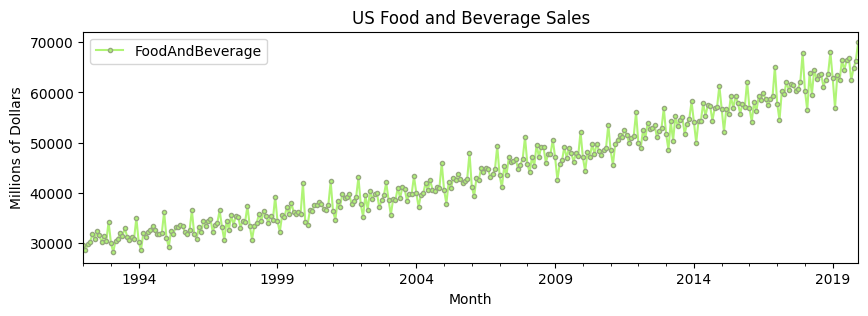

In [30]:
plt.figure(figsize=[10, 3])
ax = df_food.plot(**plot_params)
ax.set(title='US Food and Beverage Sales', ylabel='Millions of Dollars')

In [31]:
trend = df_food.rolling(
    window=12,        # 12-month window
    center=True,      # puts the average at the center of the window
    min_periods=6,    # choose about half the window size
).mean() 

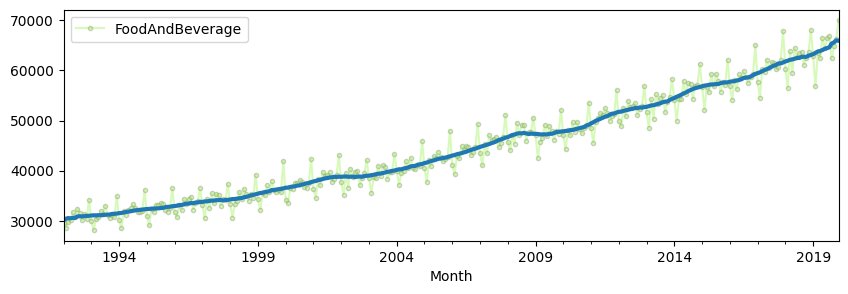

In [33]:
plt.figure(figsize=[10, 3])
ax = df_food.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [22]:
df_store = pd.read_csv(
    'train.csv',
    parse_dates=['date'],
    index_col='date'
).to_period('D')
df_store = df_store.set_index(['store_nbr', 'family'], append=True)
df_store = df_store.groupby('date').mean()['sales']
df_store

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 1684, dtype: float64

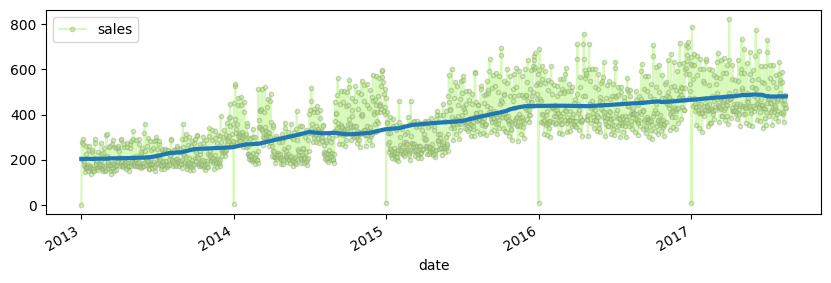

In [52]:
plt.figure(figsize=[10, 3])
trend = df_store.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = df_store.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

**Trend Feature**

In [6]:
from statsmodels.tsa.deterministic import DeterministicProcess

In [23]:
y = df_store.copy()  # the target

dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    order=3,                    # the time dummy (trend) - cubic here
)

X = dp.in_sample()

# a 90-day forecast.
X_fore = dp.out_of_sample(steps=90)

In [24]:
from sklearn.linear_model import LinearRegression

In [28]:
X

,trend,trend_squared,trend_cubed
date,,,
2013-01-01,1.0,1.0,1.000000e+00
2013-01-02,2.0,4.0,8.000000e+00
2013-01-03,3.0,9.0,2.700000e+01
2013-01-04,4.0,16.0,6.400000e+01
2013-01-05,5.0,25.0,1.250000e+02
...,...,...,...
2017-08-11,1680.0,2822400.0,4.741632e+09
2017-08-12,1681.0,2825761.0,4.750104e+09
2017-08-13,1682.0,2829124.0,4.758587e+09


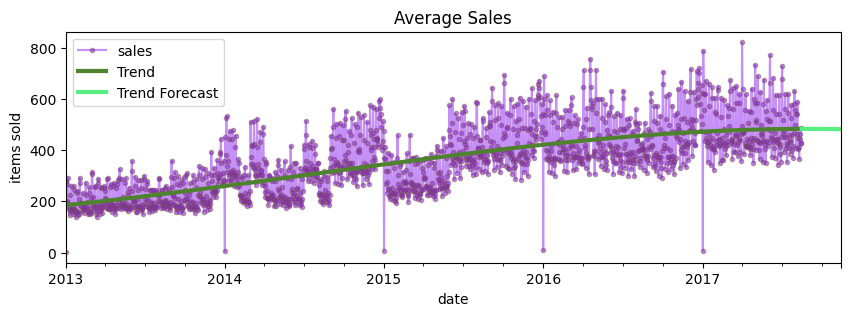

In [26]:
plt.figure(figsize=[10, 3])
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title='Average Sales', ylabel='items sold')
ax = y_pred.plot(ax=ax, linewidth=3, label='Trend', color=np.random.rand(3))
ax = y_fore.plot(ax=ax, linewidth=3, label='Trend Forecast', color=np.random.rand(3))
ax.legend()